# Homework 2

ϞϞ(๑⚈ ․̫ ⚈๑)

The latest pokedex update added a cool new feature: the `Last Seen` column, which tells us when we last encountered each pokemon. We want to analyse our historical data to better understand how to catch them all!

The data can be found under `pokedex_v2/pokemons.csv`, and is the same as homework 1 (with the added column).

## Problem 1 

Since we want to analyse historical data, let's work in the time domain. We want a sorted log of all our last pokemon encounters, indexed by time of last encounter.

💪 **Task: Load the DataFrame in a variable called `df`, index the DataFrame by `Last Seen` timestamps, then sort the DataFrame in chronological order.**

Pro-tips: 
* revisit the [`.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) documentation to understand how to parse dates correctly.
* remember to update the `df` variable everytime you modify it

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pokedex_v2/pokemons.csv',parse_dates=['Last Seen'])
df = df.set_index('Last Seen')
df = df.sort_index()
df.head()

/Users/amine/.local/share/virtualenvs/practical-data-scientist-umj5maBJ-python/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Last Seen,,,,,,,,,,,,,,
2019-12-29 23:00:00,26,21,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False
2020-01-01 17:00:00,36,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,1,False
2020-01-02 06:00:00,144,133,Eevee,Normal,NaN,325,55,55,50,45,65,55,1,False
2020-01-03 00:00:00,94,87,Dewgong,Water,Ice,475,90,70,80,70,95,70,1,False
2020-01-08 08:00:00,141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


In [2]:
def test_load_df():
    assert'df' in globals(), "DataFrame wasn't loaded in variable df"
    print('Success! 🎉')
    
def test_time_index():
    assert type(df.index) == pd.core.indexes.datetimes.DatetimeIndex, f"Expected DataFrame index type to be DatetimeIndex, but got {type(df.index)}"
    max_ts = pd.Timestamp("2021-01-06 08:00:00")
    assert df.index.max() == max_ts, f"Expected max timestamp in index to be {max_ts}, but got {df.index.max()}"
    print('Success! 🎉')
    
def test_sorted_index():
    assert df.index.is_monotonic_increasing, "Expected time index to be sorted by chronological order"
    print('Success! 🎉')
    
test_load_df()
test_time_index()
test_sorted_index()

Success! 🎉
Success! 🎉
Success! 🎉


## Problem 2

Oh dear, Misty recently borrowed our pokedex, and now we can't tell which pokemons were found by whom!

💪 **Task: Add a `Trainer` column, with value `Misty` for pokemons `Last Seen` in July 2020, and value `Me` for the rest.**

Pro-tip: make sure you update the `df` object!

In [3]:
df['Trainer'] = "Me"
df.loc['07/2020','Trainer'] = "Misty"

In [4]:
def test_trainer_column():
    assert "Trainer" in df.columns, "Can't find column 'Trainer'"
    print('Success! 🎉')
    
def test_misty_fix():
    na_count = (df["Trainer"] == "Misty").sum()
    assert na_count == 86, f"Misty should have seen 86 pokemons, but she has seen {na_count}" 
    print('Success! 🎉')
    
test_trainer_column()
test_misty_fix()

Success! 🎉
Success! 🎉


## Problem 3

The most exciting part of going on trainer adventures is coming across powerful pokemons 💪. We remember some weeks where we met very strong pokemon, and some that were more quiet. We want to visualise this by tracking the `Total` characteristic of the most powerful pokemon we met in the last 7 days.

💪 **Task: Calculate a max rolling statistic for the `Total` variable with window size of 7 days. Store it in a Series called `rolling_max_total`.**

Pro-tip: revisit the [`.rolling`] documentation to understand the difference between windows defined by number of steps, and windows defined by amount of time.


In [5]:
rolling_max_total = df['Total'].rolling('7d').max()
# The offset notation is confusing, 
#   couldn't find a proper documentation on pandas neither python should maybe search in datetime docs

In [6]:
def test_rolling_max_total():
    assert'rolling_max_total' in globals(), "Can't find variable rolling_max_total"
    assert type(rolling_max_total) == pd.Series, f"Expected `rolling_max_total` to be a Series object, but got {type(rolling_max_total)}"
    assert type(rolling_max_total.index) == pd.core.indexes.datetimes.DatetimeIndex, f"Expected DataFrame index type to be DatetimeIndex, but got {type(rolling_max_total.index)}"
    assert len(rolling_max_total) == 800, f"Expected length of rolling_max_total to be 800, but got {len(rolling_max_total)}"
    assert rolling_max_total.sum() == 532758, f"Expected sum of rolling_max_total to be 532758, but got {rolling_max_total.sum()}"
    print('Success! 🎉')

test_rolling_max_total()

Success! 🎉


💪 **Task: Visualise this rolling statistic through time.**

The code cell below should return the graph:


Pro-tip: pimp up your graph!

<AxesSubplot:xlabel='Last Seen', ylabel='Max'>

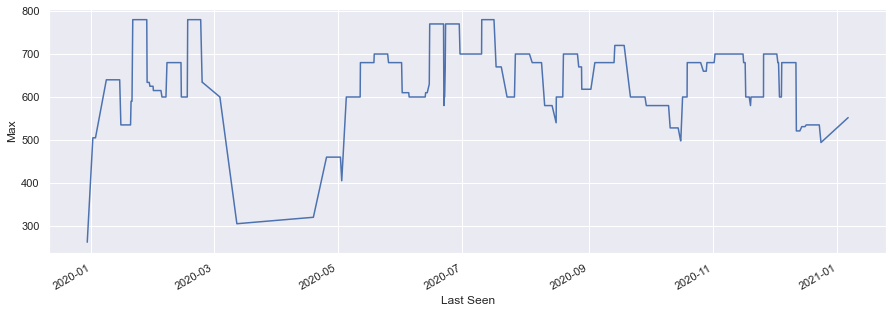

In [7]:
import seaborn as sns
sns.set_theme()
rolling_max_total.plot.line(ylabel='Max', figsize=(15,5))

🧠 **Question: Do you have an idea why the graph looks different between March and May?**

In [13]:
df.loc['03/2020':'04/2020']

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Trainer
Last Seen,,,,,,,,,,,,,,,
2020-03-04 01:00:00,137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False,Me
2020-03-12 09:00:00,72,66,Machop,Fighting,NaN,305,70,80,50,35,35,35,1,False,Me
2020-04-18 22:00:00,191,177,Natu,Psychic,Flying,320,40,50,45,70,45,70,2,False,Me
2020-04-25 09:00:00,185,171,Lanturn,Water,Electric,460,125,58,58,76,76,67,2,False,Me


The number of pokemon catched was low, therefore calculating a rolling maximum is non relevant.

## Problem 4

We started our journey a while ago, and have explored 6 entire generations of Pokemon. We'd like to visualise this journey by plotting a _histogram_ of our last pokemon encounters, grouped by `Generation`.

💪💪 **Task: Plot a histogram of pokemon encounters through time grouped by `Generation`.**

Pro-tips:
* The x-axis should be time.
* Each group should be represented with a different visual encoding
* check out [.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)
* pimp up your graph!

The graph should be displayed by the code cell below:

In [109]:
df['day'] = df.index.dayofyear
newdf = df.loc[:,['day','Total','Generation']]
newdf = newdf.set_index('day')
newdf
#newdf = df.loc[:,['Total','Generation']].groupby(['Last Seen','Generation']).count()
#newdf = newdf.reset_index(level=[0,1])
#newdf = newdf.set_index('Last Seen')
#newdf.pivot(columns='Generation',values='Total').plot.line(figsize=[15,5])

,Total,Generation
day,,
363,262,1
1,505,1
2,325,1
3,475,1
8,640,1
...,...,...
356,304,6
356,481,6
358,494,6


## Problem 5

Our pokedex updated its database with new pokemon pictures... but accidentally flipped all of them upside down! Let's fix this:

💪💪 **Task: Iterate through the pokemon images in the `images` directory, flip them the right side up, then save them in the directory called `images_flipped`.**

Pro-tips:
* to iterate through system files in python, check out [`glob`](https://docs.python.org/3/library/glob.html)
* [`os.path`](https://docs.python.org/3/library/os.path.html) has some great filename utilities


In [10]:
# INSERT YOUR CODE HERE

In [11]:
from PIL import Image

def test_image_flip():
    image = Image.open("images_flipped/17.png")
    pixel = image.getpixel((143, 125))
    expected_pixel = (200, 188, 151, 255)
    assert pixel == expected_pixel, f'Image 43.png not flipped. Expected values {expected_pixel} at pixel (143, 125), but got {pixel}'
    print('Success! 🎉')


test_image_flip()

FileNotFoundError: [Errno 2] No such file or directory: 'images_flipped/17.png'

## Problem 6

Flipping through those Pokemon images got us nostalgic, so we listen to the Pokemon theme tune. We marvel at the simple and effective linguistic construction of this poetic masterpiece: verbs are often repeated in the lyrics to emphasize the importance of our Pokemon trainer mission. What is the verb that is most often repeated?

💪  **Task: Open the `lyrics.txt` file, and analyse it with `spacy`'s english `nlp` model. Store the result in a variable called `doc`.**

Pro-tip: You might need to download the spacy model just like we did in lecture 2.2.

In [ ]:
# INSERT YOUR CODE HERE

In [ ]:
def test_doc():
    assert "doc" in globals(), "Couldn't find a variable called doc"
    assert len(doc) == 388, f"Expected 388 tokens in doc, but got {len(doc)}"
    print('Success! 🎉')
    
test_doc()

💪💪 **Task: Find the most common verb in `doc`**

The code cell below should print out the most common verb:

Pro-tips:
* "VERB" is a [_part of speech_](https://spacy.io/usage/linguistic-features#pos-tagging), which you can directly check on tokens.
* using [_lemmas_](https://spacy.io/usage/linguistic-features#lemmatization) instead of raw token text allows to normalise variations (like verb conjugations)
* [`Counter`](https://pymotw.com/2/collections/counter.html) is an easy way to count repeated elements in collections.

In [ ]:
# INSERT YOUR CODE HERE

💪💪 **Bonus Task: Visualise the distribution of verb counts in the lyrics.**

Pro-tip: check out [data to viz](https://www.data-to-viz.com/) to pick the most effective chart type.